# Exercises on Transformations

## Exercise 4.1
Implement a `translate_by(...)` function that takes a translation vector as an input and returns a translation function as output.

Let's define the function and apply it to the teapot to validate it works

In [1]:
from teapot import load_triangles
from draw_model import draw_model
from vectors import add

def polygon_map(transformation, polygons):
    return [
        [transformation(vertex) for vertex in polygon]
        for polygon in polygons
    ]

def translate_by(vector):
    def new_function(v):
        return add(vector, v)
    return new_function

draw_model(polygon_map(translate_by((-1, 0, 0)), load_triangles()))

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 0

| NOTE: |
| :---- |
| To help simplify running the cells, I have created a library `transformation_support.py` that contains the building blocks such as `polygon_map(...)` etc. so that we don't have to create them in each and every exercise. |

## Exercise 4.2

Render the teapot translated by 20 units in the negative z direction. What does the resulting image look like?

It should look as if we're looking at the teapot way above 3D model. We should be able to see the top of the teapot, and it should also look smaller, as it is way further.

In [2]:
from teapot import load_triangles
from draw_model import draw_model
from transformations_support import *

draw_model(polygon_map(translate_by((0, 0, -20)), load_triangles()))

SystemExit: 0

Note that one of our predictions is right (it's smaller), but not the other (the shape it is still centered).
The shape is further from the viewpoint `(0, 0, -5)`.

Let's see what happens when we translate from different vectors:

In [3]:
from teapot import load_triangles
from draw_model import draw_model
from transformations_support import *

draw_model(polygon_map(translate_by((-2, 0, 0)), load_triangles()))

SystemExit: 0

In [4]:
from teapot import load_triangles
from draw_model import draw_model
from transformations_support import *

draw_model(polygon_map(translate_by((0, -2, 0)), load_triangles()))

SystemExit: 0

So, what we though would happen for `(0, 0, -20)` is happening for `(0, -2, 0)`. The translation by `(-2, 0, 0)` is consistent with our expectations (move to the left) and `(0, 0, -20)` is more consisten with what we would expect for movement on the y axis.

## Exercise 4.3

What happens to the teapot when you scale every vector by a scalar between 0 and 1? What happens when you scale it by a factor of -1?

When you scale every vector by a scalar between 0 and 1 you will make the teapot smaller, but maintaining the ratio. Let's confirm:

In [5]:
from teapot import load_triangles
from draw_model import draw_model
from transformations_support import *

draw_model(polygon_map(scale_by(0.1), load_triangles()))

SystemExit: 0

If we scale every vector of the teapot by -1, we will *negate* every vector of the 3D model. As a result up will be down and left will be right (and vice versa).

In [6]:
from teapot import load_triangles
from draw_model import draw_model
from transformations_support import *

draw_model(polygon_map(scale_by(-1), load_triangles()))

SystemExit: 0

It must be noted that actually, scaling by -1 turns every vector inside-out, so each normal vector will now point into the teapot rather than outward, and therefore will create problem while rendering.

Let's rotate the scaled teapot to see that:

In [7]:
from teapot import load_triangles
from draw_model_custom_impl import draw_model_anim
from transformations_support import *

draw_model_anim(polygon_map(scale_by(-1), load_triangles()))


SystemExit: 0

See how it does not render correctly, specially the spout.

## Exercise 4.4

First apply a `translate1left(...)` to the teapot and then `scale2`. How is the result different when you compose the functions in different order?

We know that if we first scale and then translate, a double size teapot will be found translated to the left. However, if we first translate and scale, the teapot will be stretched:

In [9]:
from teapot import load_triangles
from draw_model_custom_impl import draw_model_anim
from transformations_support import *

draw_model_anim(polygon_map(compose(translate_by((-1, 0, 0)), scale_by(2)), load_triangles()), display_axes=True)

SystemExit: 0

In [10]:
from teapot import load_triangles
from draw_model_custom_impl import draw_model_anim
from transformations_support import *

draw_model_anim(polygon_map(compose(scale_by(2), translate_by((-1, 0, 0))), load_triangles()), display_axes=True)

SystemExit: 0

So we were wrong again: if we first translate and then scale, the 3D model is translated further to the left. This is because when the scaling factor of 2 is applied after the translation, the distance of the translation doubles as well.

![Transformation Order is important](../images/transformation_order.png)

## Exercise 4.5

What is the effect of the transformation `compose(scale_by(0.4), scale_by(1.5))`?

The effect will be the scaling the 3D shape by $ 0.4 \times 1.5 = 0.6 $

In [11]:
from teapot import load_triangles
from draw_model_custom_impl import draw_model_anim
from transformations_support import *

draw_model_anim(polygon_map(compose(scale_by(0.4), scale_by(1.5)), load_triangles()))

SystemExit: 0

## Exercise 4.6

Modify the `compose(...)` function so that it can take a variable number of arguments that will be applied in given order.

Let's see what is the anatomy of the `compose(f1, f2)` function and think about how it can be generalized:

```python
def compose(f1, f2):
    def new_function(input):
        return f1(f2(input))
    return new_function
```

In [12]:
def compose_multiple(*fArgs):
    def new_function(input):
        resulting_f = None
        for f in fArgs:
            resulting_f = f(input)
        return resulting_f
    return new_function

from teapot import load_triangles
from draw_model_custom_impl import draw_model_anim
from transformations_support import *

draw_model_anim(polygon_map(compose_multiple(scale_by(0.4), scale_by(1.5), scale_by(2)), load_triangles()))

SystemExit: 0

This can be further improved, by applying it in reversed order, so that it is applied in the same order as `compose(f_last, f_first)`. Also, if no function given the *identity* transformation is applied (no transformation).

In [ ]:
def compose(*fArgs):
    def new_function(input):
        state = input
        for f in reversed(args):
            state = f(state) 
            return state     
    return new_function

In [13]:
from teapot import load_triangles
from draw_model_custom_impl import draw_model_anim
from transformations_support import *

draw_model_anim(polygon_map(compose(scale_by(0.4), scale_by(1.5), scale_by(2), translate_by((-1, 0, 0))), load_triangles()))

SystemExit: 0

Note that the `compose(...)` function is not constrained to 3D transformations, it can be applied to all type of Python functions that receive an input and transforms it:

In [14]:
def prepend(string):
    def new_function(input):
        return string + input
    return new_function


f = compose(prepend('P'), prepend('Y'), prepend('T'))
print(f('HON'))


PYTHON


## Exercise 4.7

Write a `curry2(f)` that takes a Python function `f(x, y)` with two arguments and returns a curried version.

That is, `g = curry2(f)` the result of `f(x, y)` and `g(x)(y)` should return the same result.

Currying is the process of transforming a function that takes multiple arguments in a function that takes a single argument and returns another function which accepts further arguments, one by one, that the original function would receive.

In our case, we have a function `f(x, y)` that receives two arguments. Therefore, we'll use *currying* to transform it into `g(x)(y)`.

Let's do it in Python:

In [15]:
# no currying
scale_by_2 = scale_by(2)
print(scale_by_2((1, 2, 3)))


def curry2(f):
    def g(x):
        def new_function(y):
            return f(x, y)
        return new_function
    return g

scale_by = curry2(scale)

print(scale_by(2)((1, 2, 3)))

(2, 4, 6)
(2, 4, 6)


## Exercise 4.8

Without running it, what is the result of applying the transformation `compose(rotate_z_by(pi/2), rotate_x_by(pi/2))? What if you switch the order of the composition?

The result will be the teapot rotated by the x-axis 90° towards us, so that we see the top part of the teapot, and then rotated 90° about the z-axis, so that the spout is looking down.

Let's confirm:

In [16]:
from teapot import load_triangles
from draw_model_custom_impl import draw_model_anim
from transformations_support import *
from math import pi

draw_model_anim(polygon_map(rotate_z_by(pi / 2.), load_triangles()))

SystemExit: 0

In [1]:
from teapot import load_triangles
from draw_model_custom_impl import draw_model_anim
from transformations_support import *
from math import pi

draw_model_anim(polygon_map(rotate_x_by(pi / 2.), load_triangles()))

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 0

In [17]:
from teapot import load_triangles
from draw_model_custom_impl import draw_model_anim
from transformations_support import *
from math import pi

draw_model_anim(polygon_map(compose(rotate_z_by(pi / 2.), rotate_x_by(pi / 2.)), load_triangles()))

SystemExit: 0

If we apply the reverse composition, the spout will be in our direction:

In [18]:
from teapot import load_triangles
from draw_model_custom_impl import draw_model_anim
from transformations_support import *
from math import pi

draw_model_anim(polygon_map(compose(rotate_x_by(pi / 2.), rotate_z_by(pi / 2.)), load_triangles()))

SystemExit: 0

## Exercise 4.9

Write a function `stretch_x(scalar, vector)` that scales the target vector by the given factor, but only in the x direction.

Also, write a curried version of `stretch_x_by(...)` so that `stretch_x_by(scalar)(vector)` returns the same result.

I'm already used to *currying* as seen in the previous example, without currying it would be:

```python
def stretch_x(scalar, vector):
    ...
```



In [19]:
from teapot import load_triangles
from draw_model_custom_impl import draw_model_anim
from transformations_support import *

# no currying

def stretch_x(scalar, vector):
    x, y, z = vector
    return (scalar * x, y, z)

transformed_triangles = [
    [stretch_x(1.5, v) for v in triangle]
    for triangle in load_triangles()
]

draw_model_anim(transformed_triangles)

SystemExit: 0

In [20]:
from teapot import load_triangles
from draw_model_custom_impl import draw_model_anim
from transformations_support import *

def stretch_x(scalar):
    def new_function(v):
        x, y, z = v
        return (scalar * x, y, z)
    return new_function

draw_model_anim(polygon_map(stretch_x(0.5), load_triangles()))


SystemExit: 0

## Exercise

In the previous exercises, there is a mixture of implementations from the appendix, implementations from the book, and my implementations from the exercises and concepts.

Create a project [e03 &mdash; my implementation](../e03-my-implementation/README.md) in which my implementations are used, instead of the ones given by the author.

It is done in the given directory.

## Exercise 4.10

Considering $ S $ again as the vector transformation that squares the coordinates of the vector on which the transformation is applied, show algebraically that $ S(s \cdot v) = s \cdot S(v) $ does not hold for all choices of scalars $ s $ and 2D vectors $ v $.

$ 
S(v) = S((x, y)) = (x², y²) \\
S(s \cdot v) = S((s \cdot x, s \cdot y)) = ((s \cdot x)², (s \cdot y)²) \\
= (s² \cdot x², s² \cdot y²) = s² \cdot (x², y²) = s² \cdot S((x, y)) \\
= s² \cdot S(v)
$

Therefore, $ S(s \cdot v) \ne s \cdot S(v) $, but rather $ S(s \cdot v) = s² \cdot S(v) $

As a counterexample, $ S(2 \cdot (1, 1, 1)) = (4, 4, 4) \ne (2, 2, 2) = 2 \cdot S(1, 1, 1) $

## Exercise 4.11

Suppose $ T $ is a vector transformation and $ T(\vec{0}) \ne \vec{0} $, where $ \vec{0} $ represents the vector zero, that is, the vector with all coordinates equal to zero.

Why is $ T $ not linear?

Alebraically, $ w + \vec{0}  = w $

Therefore,

$ T(w) = T(w + \vec{0}) $

If $ T $ were a linear transformation:

$ T(w + \vec{0}) = T(w) + T(\vec{0}) $

Then, using the first formula and applying it to the second:

$ 
T(w + \vec{0}) = T(w + \vec{0}) + T(\vec{0}) \\ 
\vec{0} = T(\vec{0})
$

which cannot be.

## Exercise 4.12

The identity transformation is the vector transformation that returns the same vector it is passed. It is denoted as $ I $.

Demonstrate that $ I $ is a linear transformation.

We know that a linear transformation preserves linear combinations.

Therefore, it must fulfill:

$ 
I(a \cdot u + b \cdot v) = a \cdot I(u) + b \cdot I(v) 
$

As $ I(u) = u $ and $ I(v) = v $:
$
I(a \cdot u + b \cdot v) = a \cdot u) + b \cdot v = a \cdot I(u) + b \cdot I(v)
$

and therefore, preserves linear combination.

| NOTE: |
| :---- |
| note that demonstrating that a transformation preserves a linear combination is enough to demonstrate it is a linear transformation because the sum of vectors is particular case of linear combination where $ a = b = 1 $ and scalar product is a particular case where $ b = 0 $. |

## Exercise 4.13

What is the midpoint between $ (5, 3) $ and $ (-2, 1) $. Plot all these three points to see that you are correct.

We saw in the concept section that the *midpoint* of the segment defined by two vectors is the transformation $ \frac{1}{2} \cdot (u + v) $.

Therefore: $ P = (1.5, 2 ) $

Let's confirm by plotting it:

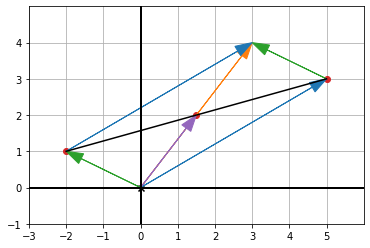

In [8]:
from my_draw2d import *
from vectors_my_implementation import *

u = (5, 3)
v = (-2, 1)
midpoint = scale(0.5, add(u, v))

draw2d(
    Arrow2D(add(u, v), color=orange),
    Arrow2D(add(u, v), u, color=green),
    Arrow2D(add(u, v), v, color=blue),
    Segment2D(u, v, color=black),
    Points2D(u, v, midpoint, color=red),
    Arrow2D(u, color=blue),
    Arrow2D(v, color=green),
    Arrow2D(midpoint, color=purple)

)




## Exercise 4.14

Consider again the non-linear transformation $ S(v) = S((x, y)) = (x², y² ) $.

Plot all 36 vectors v with integer coordinates from 0 to 5 as points, and then plot the result of applying $ S(v) $ for each of them. What happens geometrically to vectors under the action of S?

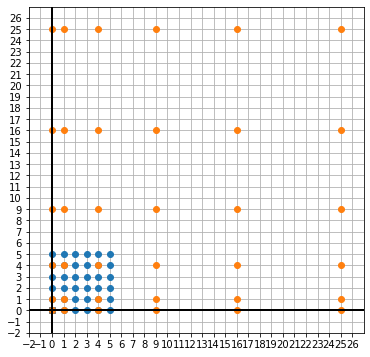

In [10]:
from my_draw2d import *
from vectors_my_implementation import *

original_points = [(x, y) for x in range(0, 6) for y in range(0, 6)]

def s_transformation(p):
    x, y = p
    return (x * x, y * y)

transformed_points = [s_transformation(p) for p in original_points]

draw2d(
    Points2D(*original_points, color=blue),
    Points2D(*transformed_points, color=orange)
)

The points seem to explode after applying the transformation, as the space between the points is no longer equal, but rather increases.

## Exercise 4.15

Property-based testing is a type of unit testing that involves inventing arbitrary input data for a program and then checking that the output satisfies the desired conditions. There are popular libraries like *Hypothesis* that make it easy to set up. Using your library of choice, implement property based tests that check if a vector transformation is linear.


The idea is to generate a large number of random values and then check whether the transformation preserves linear combinations.

from rangom import uniform:


In [1]:
from random import uniform
from vectors_my_implementation import *

def random(min, max):
    def new_function():
        return uniform(min, max)
    return new_function

def s_transform(v):
    x, y = v
    return (x * x, y * y)

def identity_transform(v):
    return v

def apply_linear_combo(f1, v1, f2, v2):
    return add(scale(f1, v1), scale(f2, v2))

rand = random(-1000, 1000)

def property_based_testing(label, num_samples, rand, transformation):
    print(label)
    failed = False
    for i in range(0, num_samples):
        f1 = rand()
        v1_x = rand()
        v1_y = rand()
        f2 = rand()
        v2_x = rand()
        v2_y = rand()

        # S(f1v1 + f2v2)
        op_1 = transformation(apply_linear_combo(f1, (v1_x, v1_y), f2, (v2_x, v2_y)))

        # f1 S(v1) + f2 S(v2)
        op_2 = apply_linear_combo(f1, transformation((v1_x, v1_y)), f2, transformation((v2_x, v2_y)))

        if op_1 != op_2:
            v1 = (v1_x, v1_y)
            v2 = (v2_x, v2_y)
            failed = True
            print('#{}: Transformation does not hold for f1={} v1={} f2={} v2={}'.format(i, f1, v1, f2, v2))
            break
    if failed:
        print('Transformation {} is not a linear transformation'.format(label))
    else:
        print('Transformation {} held after {} attempts to break it'.format(label, num_samples))


property_based_testing('Squared Transformation: ', 10000, rand, s_transform)
property_based_testing('Identity Transformation:', 10000, rand, identity_transform)


Squared Transformation: 
#0: Transformation does not hold for f1=67.56108678098963 v1=(541.8151261205778, 814.3122844675595) f2=-355.5377498019767 v2=(-37.73057494083059, 572.9390568917563)
Transformation Squared Transformation:  is not a linear transformation
Identity Transformation:
Transformation Identity Transformation: held after 10000 attempts to break it


## Exercise 4.16

One 2D vector transformation is reflection across the x-axis. This transformation takes a vector and returns another one, which is the mirror image with respect the x-axis. Its x-coordinate should be unchanged, and its y-coordinate should change its sign. Denoting this transformation as $ S_x(v) $:

Draw two vectors and their sum, as well as the reflection of these three vectors to demonstrate that this transformation preserves the vector addition. Draw another diagram to show similarly that scalar multiplication is preserved, thereby demonstrating visually both criteria for linearity.

We'll draw this transformation to picture whether this transformation looks like a linear transformation preserving vector addition and scalar multiples or not.

Let's begin with vector addition. We should see *graphically* that:

$
S_x(u + v) = S_x(u) + S_x(v)
$

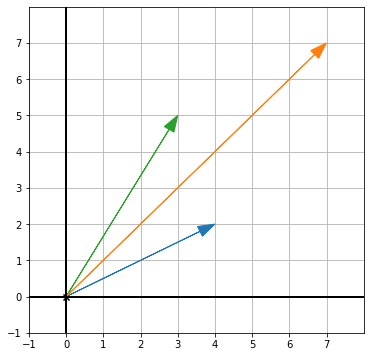

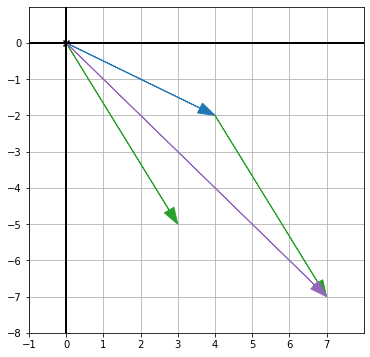

In [3]:
from my_draw2d import *
from vectors_my_implementation import *

u = (4, 2)
v = (3, 5)
sum_vector = add(u, v)

draw2d(
    Arrow2D(u, color=blue),
    Arrow2D(v, color=green),
    Arrow2D(sum_vector, color=orange)
)

def sx(v):
    x, y = v
    return (x, -y)

sx_u = sx(u)
sx_v = sx(v)
sx_sum_vector = sx(sum_vector)

draw2d(
    Arrow2D(sx_u, color=blue),
    Arrow2D(sx_v, color=green),
    Arrow2D(add(sx_u, sx_v), sx_u, color=green),
    Arrow2D(sx_sum_vector, color=purple)
)




We can see that $ S_x(u + v) = S_x(u) + S_x(v) $, and there does not seem to be any evident reason why it wouldn't be the same for any pair of $ u $ and $ v $ vectors.

Let's now do the same for the scalar multiples:

$
S_x(s \cdot u) = s \cdot S_x(u)
$

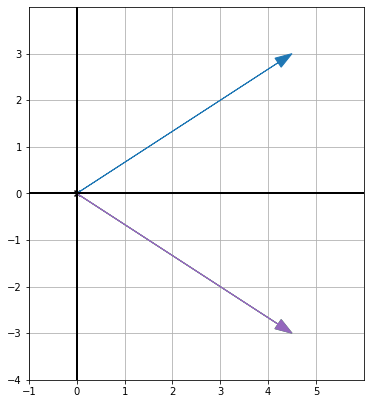

In [5]:
from my_draw2d import *
from vectors_my_implementation import *

u = (3, 2)
s = 1.5
scalar_product = scale(s, u)

def sx(v):
    x, y = v
    return (x, -y)

sx_u = sx(u)
sx_scalar_product = sx(scalar_product)

draw2d(
    Arrow2D(scalar_product, color=blue),
    Arrow2D(scale(s, sx_u), color=green),
    Arrow2D(sx_scalar_product, color=purple)
)


We see only the purple arrow, which demonstrates that $ S_x(s \cdot u) = s \cdot S_x(u) $.

Also, we see no evidence why it shouldn't work for other $ s $ and $ u $.

Obviously, this is no Mathematical proof that reflection is a linear transformation, but this method can give us an early indication about whether a transformation is linear or not.

Also, demonstrating that $ S_x(a \cdot u + b \cdot v) = a \cdot S_x(u) + b \cdot S_x(v) $, for $ S_x(u) = S_x((x, y)) = (x, -y) $ is fairly easy.

## Exercise 4.17

Suppose $ S $ and $ T $ are both linear transformations. Explain why the composition of $ S $ and $ T $ is also linear.

Because $ S $ and $ T $ are linear transformations, we know that:

$
S( a \cdot u + b \cdot v) = a \cdot S(u) + b \cdot S(v) \\
T( a \cdot u + b \cdot v) = a \cdot T(u) + b \cdot T(v)
$

Therefore:

$
T(S(a \cdot u + b \cdot v)) = T(a \cdot S(u) + b \cdot S(v)) \\
= a \cdot T(S(u)) + b \cdot T(S(v))
$

And therefore, $ T(S(u)) $ is linear as it preserves linear combinations.

# Exercise 4.18

Let T be the linear transformation done by the Python function `rotate_x_by(pi / 2)`. What are $ T(e1) $, $ T(e2) $ and $ T(e3) $?

Let's use Python first, then elaborate on the answer afterwards:

In [6]:
from my_draw3d import *
from transformations_support import *

e1 = (1, 0, 0)
e2 = (0, 1, 0)
e3 = (0, 0, 1)

rotated_e1 = rotate_x_by(pi / 2)(e1)
rotated_e2 = rotate_x_by(pi / 2)(e2)
rotated_e3 = rotate_x_by(pi / 2)(e3)

print('{} => {}'.format(e1, rotated_e1))
print('{} => {}'.format(e2, rotated_e2))
print('{} => {}'.format(e3, rotated_e3))

(1, 0, 0) => (1, 0.0, 0.0)
(0, 1, 0) => (0, 6.123233995736766e-17, 1.0)
(0, 0, 1) => (0, -1.0, 1.2246467991473532e-16)


Thus:

+ $ e1 $ does not change when transformed
+ $ e2 $ becomes $ e3 $
+ $ e3 $ becomes - $ e2 $

Let's see if the fact matches our expectations:

When we rotate about an axis, the coordinate for that axis won't change. This is consistent with $ e1 $ being unaffected with the change, and $ e2 $ and $ e3 $ x coordinate being zero.

Then, for $ e2 = (0, 1, 0) $, if we rotate by 90° it effectively means a 90° rotation on the x = 0 plane.

Similarly, for $ e3 = (0, 0, 1) $, if we rotate 90°, it means a rotation on the x = 0 plane, which will make it $ -e2 $.

## Exercise 4.19

Write a `linear_combination(scalars, vectors)` that takes a list of scalars and the same number of vectors and returns a single vector.

In [18]:
from vectors_my_implementation import *

def linear_combination(scalars, *vectors):
    result = add(*[scale(s, v) for s,v in zip(scalars, vectors)])
    return result

# should be (22, 28)
print(linear_combination([1, 2, 3], (1, 2), (3, 4), (5, 6))) 

# should be (1, 2, 3)
print(linear_combination([1, 2, 3], (1, 0, 0), (0, 1, 0), (0, 0, 1)))


(22, 28)
(1, 2, 3)


For the first time, implementation looks good, but in terms of style, let's do it a bit more Pythonic:

In [19]:
from vectors_my_implementation import *

def linear_combination(scalars, *vectors):
    scaled = [scale(s, v) for s,v in zip(scalars, vectors)]
    return add(*scaled)

# should be (22, 28)
print(linear_combination([1, 2, 3], (1, 2), (3, 4), (5, 6))) 

# should be (1, 2, 3)
print(linear_combination([1, 2, 3], (1, 0, 0), (0, 1, 0), (0, 0, 1)))

(22, 28)
(1, 2, 3)


# Exercise 4.20

Write a function `transform_standard_basis(transform)` that takes a 3D vector transformation as an input and outputs the effect it has on the standard basis. It should output a tuple of 3 vectors that are the result of the transform acting on $ e1 $, $ e2 $ and $ e3 $.

In [21]:
from transformations_support import *

def transform_standard_basis(transform):
    e1 = (1, 0, 0)
    e2 = (0, 1, 0)
    e3 = (0, 0, 1)
    return tuple(transform(v) for v in [e1, e2, e3])


def identity_transform(v):
    return v


print(transform_standard_basis(identity_transform))
print(transform_standard_basis(rotate_x_by(pi / 2)))


((1, 0, 0), (0, 1, 0), (0, 0, 1))
((1, 0.0, 0.0), (0, 6.123233995736766e-17, 1.0), (0, -1.0, 1.2246467991473532e-16))


Probably, it was an unnecessary use of tuples and comprehensions, so a cleaner and more explicit implementation could be:

In [25]:
from transformations_support import *

def transform_standard_basis(transform):
    return (transform((1, 0, 0)), transform((0, 1, 0)), transform((0, 0, 1)))

def identity_transform(v):
    return v


print(transform_standard_basis(identity_transform))
print(transform_standard_basis(rotate_x_by(pi / 2)))

((1, 0, 0), (0, 1, 0), (0, 0, 1))
((1, 0.0, 0.0), (0, 6.123233995736766e-17, 1.0), (0, -1.0, 1.2246467991473532e-16))


## Exercise 4.21

Suppose $ B $ is a linear transformation, with $ B(e1) = (0, 0, 1) $, $ B(e2) = (2, 1, 0) $, $ B(e3) = (-1, 0, -1) $.
Let $ v = (-1, 1, 2) $. What is $ B(v) $?

Very easy, as in virtue of linear transformations: 

$ 
B(a \cdot u + b \cdot v) = a \cdot B(u) + b \cdot B(v)
$

$
B(v) = B((-1, 1, 2)) = B(-e1 + e2 + 2 \cdot e3) \\
= -1 \cdot B(e1) + B(e2) + 2 \ cdot B(e3) \\
= -1 \cdot (0, 0, 1) + (2, 1, 0) + 2 \cdot (-1, 0, -1) \\
= (0, 1, -3)
$

## Exercise 4.22

Suppose $ A $ and $ B $ are both linear transformations with:
$
A(e1) = (1, 1, 1), \hspace{1ex} A(e2) = (1, 0, -1), \hspace{1ex} A(e3) = (0, 1, 1) \\
B(e1) = (0, 0, 1), \hspace{1ex} B(e2) = (2, 1, 0), \hspace{1ex} B(e3) = (-1, 0, -1) \\
$

Calculate $ A(B(e1)) $, $ A(B(e2)) $ and $ A(B(e3)) $

Again, this is extremely easy in virtue of how linear transformations behave on linear combinations:

$
A(B(e1)) = A((0, 0, 1)) = A(e3) = (0, 1, 1)
$

$
A(B(e2)) = A((2, 1, 0)) = A(2e1 + e2) = 2 \cdot A(e1) + A(e2) \\
= (2, 2, 2) + (1, 0, -1) = (3, 2, 1)
$

$
A(B(e3)) = A((-1, 0, -1)) = A(-e1-e3) = -A(e1)-A(e3) \\
= (-1, -1, -1)-(0, 1, 1) = (-1, -2, -2)
$

Note that as we now know the effect of $ A(B(v)) $ on the three vectors of the standar basis, we could compute the effect of this linear transformation for any vector.
